In [ ]:
Source : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

# TRAIN_TEST_SPLIT

In [1]:
# importing Libraries
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [3]:
df.shape

(442, 10)

In [4]:
y.shape #--> so it is a array

(442,)

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [7]:
#Predicted Values:
predictions[:5]

array([140.81380088, 104.00656507, 161.97251306, 102.34317666,
       217.95428595])

In [8]:
#True Values:
y_test[:5]

array([ 59., 118., 196.,  81., 295.])

Text(0, 0.5, 'Predictions')

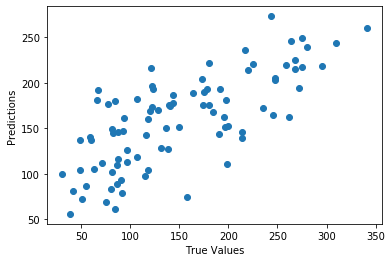

In [9]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [10]:
#Accuracy
print ("Score:", model.score(X_test, y_test))

Score: 0.5177397300543503


# CROSS VALIDATION:

In [11]:
# import numpy as np
# from sklearn.model_selection import KFold # import KFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
# y = np.array([1, 2, 3, 4]) # Create another array
# kf = KFold(n_splits=2) # Define the split - into 2 folds 
# kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
# print(kf)

In [12]:
# for train_index, test_index in kf.split(X):
#  print("TRAIN:", train_index, "TEST:", test_index)
#  X_train, X_test = X[train_index], X[test_index]
#  y_train, y_test = y[train_index], y[test_index]

In [13]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [15]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


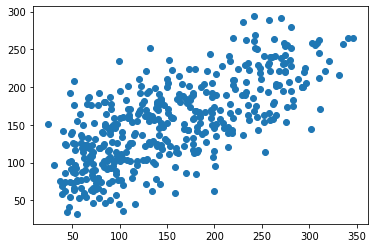

In [18]:
#Now, let’s plot the new predictions, after performing cross validation:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

In [20]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4908065838640775
